# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
b_count = sum(data[data.race=='b'].call)
# number of callbacks for white-sounding names
w_count = sum(data[data.race=='w'].call)
sum_count = b_count+w_count
print("Percent of callbacks for 'black-sounding': {}".format(round(b_count/sum_count, 3)))
print("Percent of callbacks for 'white-sounding': {}".format(round(w_count/sum_count, 3)))

Percent of callbacks for 'black-sounding': 0.401
Percent of callbacks for 'white-sounding': 0.599


In [4]:
calls = data[['race', 'call']].copy()
calls['call'] = data.call.astype('int8')
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 2 columns):
race    4870 non-null object
call    4870 non-null int8
dtypes: int8(1), object(1)
memory usage: 80.8+ KB


# Does race has a significant impact on the rate of callbacks for resumes

## 1. What test is appropriate for this problem? Does CLT apply?

<div class="span5 alert alert-success">
<p>Answer to Q1:</p>

For this study, the sample size is large (<b>4870 observations</b>), clearly greater than 30 samples and we are dealing with two independent groups, <b>'black-sounding'</b> and <b>'white-sounding'</b>. Based on this information, the appropriate test we should use is a <b>Two-Sample</b> test along with the <b><i>z</i>-statistic</b>.

In addition, because the sample size <b>n > 30</b>, the <b>Central Limit Theorem (CLT)</b> does in fact apply. Indicating, that as the sample sizes get larger, the distribution of means calculated from repeated sampling will approach normality.
</div>

## 2. What are the null and alternate hypotheses?

<div class="span5 alert alert-success">
<p>Answer to Q2:</p>
We want to look at the difference of means, such that:<br><br>
$H_{0}:$ race does not have a significant impact on the rate of callbacks for resumes.<br>
$\mu_{\bar{x}_1} - \mu_{\bar{x}_2} = 0$ <br><br>
$H_{A}:$ race does have a significant impact on the rate of callbacks for resumes.<br>
$\mu_{\bar{x}_1} - \mu_{\bar{x}_2} \neq 0$ <br>
</div>

# 3. Compute margin of error, confidence interval, and p-value. 

## Try using both the bootstrapping and the frequentist statistical approaches.

In [5]:
w_mean = round(np.mean(calls[calls.race=='w'].call),4)
b_mean = round(np.mean(calls[calls.race=='b'].call),4)
print("Mean for 'white-sounding' calls: {}".format(w_mean))
print("Mean for 'black-sounding' calls: {}".format(b_mean))

# compute empirical difference of means
diff_means = w_mean - b_mean
print("Difference of means: {}".format(diff_means))

Mean for 'white-sounding' calls: 0.0965
Mean for 'black-sounding' calls: 0.0645
Difference of means: 0.032


In [6]:
# split calls by 'race'
w_calls = calls[calls.race=='w'].call
b_calls = calls[calls.race=='b'].call
print("Number of calls for 'white-sounding':\t{}\t 'black-sounding':\t{}".format(len(w_calls), len(b_calls)))

# first, compute the mean of all calls
calls_mean = np.mean(calls['call'].values)

# set 95% confidence level
cl = 1.96

# compute the standard error: se = (σ1 / √n1) + (σ2 / √n2)
se = (np.std(w_calls) / np.sqrt(len(w_calls))) + (np.std(b_calls) / np.sqrt(len(b_calls)))

# compute margin of error: ME = cf * SE
me = round(cl * se, 3)
print("Margin of Error: {}".format(me))

z_score = diff_means / se
print("Z-statistic: {}".format(z_score))

# compute the confidence interval
ci_min = round(diff_means - me, 3)
ci_max = round(diff_means + me, 3)
print('Confidence interval: [{} , {}]'.format(ci_min, ci_max))

Number of calls for 'white-sounding':	2435	 'black-sounding':	2435
Margin of Error: 0.021
Z-statistic: 2.919390087122258
Confidence interval: [0.011 , 0.053]


In [7]:
# define same functions from datacamp modules to generate bootstrap replicates
def bootstrap_replicate(data, func):
    """
    Generate bootstrap replicate data
    """
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """
    Draw bootstrap replicates
    """
    # initialize array of replicates
    bs_replicates = np.empty(size)
    # generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data, func)
    return bs_replicates

Formula for Two-Sample z-test to compare two means:
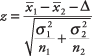

Where:
* $\bar{x}_1$ = sample 1 mean
* $\bar{x}_2$ = sample 2 mean
* Δ = 0 (0 since testing for equal means)
* ${σ}_1$ = sample 1 standard deviation
* ${σ}_2$ = sample 2 standard deviation
* ${n}_1$ = sample 1 size
* ${n}_2$ = sample 2 size

In [8]:
# set random seed
np.random.seed(20)

# set alpha
alpha = 0.05

# generate shifted arrays
w_shifted_mean = w_calls - np.mean(w_calls) + calls_mean
b_shifted_mean = b_calls - np.mean(b_calls) + calls_mean

# compute 10,000 bootstrap replicates from shifted arrays
w_bs_reps = draw_bs_reps(w_shifted_mean, np.mean, 10000)
b_bs_reps = draw_bs_reps(b_shifted_mean, np.mean, 10000)

# get replicates of difference of means
bs_replicates = w_bs_reps - b_bs_reps

# compute the p-value
p_val = np.sum(bs_replicates>=diff_means) / len(bs_replicates)

print("\n******* Result ********\n")
print('Using Bootstrap Hypothesis Testing on two groups, we compute:\n')
print('p-value = {}\n'.format(p_val))

if(p_val > alpha): 
    print('The p-value ({}) is > {}, so we cannot reject the null hypothesis.'.format(p_val, alpha))
    print('Thus, we are able to say that the rate of callbacks for resumes is not impacted by race')
else:
    print('The p-value ({}) is <= {}, so we can reject the null hypothesis.'.format(p_val, alpha))
    print('Thus, we are unable to say that the rate of callbacks for resumes is not impacted by race')
print("\n***********************\n")


******* Result ********

Using Bootstrap Hypothesis Testing on two groups, we compute:

p-value = 0.0

The p-value (0.0) is <= 0.05, so we can reject the null hypothesis.
Thus, we are unable to say that the rate of callbacks for resumes is not impacted by race

***********************



Frequentist statistical approach: Using **Permutations Test** 

In [9]:
# define function to compute difference of means
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # the difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# define function to generate permutation sample from two data sets
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# define function to perform permutation replicates (as used in DataCamp)
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [10]:
# compute difference of mean impact force from experiment
empirical_diff_means = diff_of_means(w_calls, b_calls)

# draw 10,000 permutation replicates
perm_replicates = draw_perm_reps(w_calls, b_calls, diff_of_means, size=10000)

# compute p-value
p_val = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# compute 95% confidence interval
ci = np.percentile(perm_replicates, [2.5, 97.5])

print("\n******* Result ********\n")
print('Using Permutation Test on two samples, we compute:\n')
print('Difference of means: {}'.format(empirical_diff_means))
print('Confidence interval:', ci)
print('p-value = {}\n'.format(p_val))

if(p_val > alpha): 
    print('The p-value ({}) is > {}, so we cannot reject the null hypothesis.'.format(p_val, alpha))
    print('Thus, we are able to say that the rate of callbacks for resumes is not impacted by race')
else:
    print('The p-value ({}) is <= {}, so we can reject the null hypothesis.'.format(p_val, alpha))
    print('Thus, we are unable to say that the rate of callbacks for resumes is not impacted by race')
print("\n***********************\n")


******* Result ********

Using Permutation Test on two samples, we compute:

Difference of means: 0.032032854209445585
Confidence interval: [-0.01560575  0.01560575]
p-value = 0.0

The p-value (0.0) is <= 0.05, so we can reject the null hypothesis.
Thus, we are unable to say that the rate of callbacks for resumes is not impacted by race

***********************



# 4. Write a story describing the statistical significance in the context or the original problem.

<div class="span5 alert alert-success">
<p> Answer to Q4:</p>

<p>
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers. In this study, we are provided a dataset where each row represents a résumé. A 'race' column consisting of two values, 'b' and 'w', indicate a black-sounding and white-sounding name. The column 'call', with two values, 1 and 0, indicate whether the résumé received a callback from employers or not. It is important to note that the 'b' and 'w' values in race column were randomly assigned to the résumés when presented to the employer.

When comparing the number of callbacks for 'white-sounding' vs. 'black-sounding' names, we see that 'white-sounding' names receive nearly 60% callbacks, while 'black-sounding' only receive about 40%. Using two separate tests (bootstraping and permutations) to analyze the data, we determined that having a 'black-sounding' name on a résumé negatively impacts the chances of receiving a callback from a prospective employer. 
</p>
</div>

# 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

<div class="span5 alert alert-success">
<p> Answer to Q5:</p>


<p>
While a 'race-sounding' name on a résumé does appear to have a major impact on callbacks from employers, it is not possible to determine if it is the most important factor in callback success from just these two tests. 

This is because we would need to consider other factors that may directly or indirectly affect whether an employer calls someone back. 

It makes sense to perform similar tests using additional observations available in the data set. I would consider taking a look at 'race-sounding' names combined with education, experience, military status, skill sets, and just as importantly, gender. 
</p>

</div>